In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# 假设你已经有一个函数来加载文件夹中的数据
def load_time_series_data(folder_path):
    # 这里应该是加载数据的代码
    df = pd.read_csv(folder_path,encoding='gbk')
    mask = df['脑电连接信号是否正常'] != 0
    df = df[~mask]
    df = df.reset_index(drop=True)
    time_series_data = df.iloc[:,5:13]
    return time_series_data


In [42]:
#归一化
from sklearn.preprocessing import MinMaxScaler

def Scaler(time_series_data):
    scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
    scaler.fit(time_series_data)
    scaled_features = scaler.transform(time_series_data)
    df_MinMax = pd.DataFrame(data=scaled_features, columns=["Delta","Theta","Alpha1","Alpha2","Beta1",
                                                        "Beta2","Gamma1","Gamma2"])
    # 转置数据
    df_transposed = df_MinMax.T
    return df_transposed

In [65]:
#聚类
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw_path


def cluster(time_series_data):
    # 数据标准化
    df_transposed = time_series_data.T
    scaler = TimeSeriesScalerMeanVariance()
    X_train = scaler.fit_transform(df_transposed)

    # 假设 X 是你的数据集，每行是一个时间序列
    n_clusters = 2 # 想要的聚类数目
    time_series_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', random_state=42)
    time_series_kmeans.fit(X_train)
    clusters = time_series_kmeans.labels_ 
    return clusters



In [80]:
time_series_data = load_time_series_data('./脑电波数据/A3.csv')
df_transposed = time_series_data.T
scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(df_transposed)
n_clusters = 2 # 想要的聚类数目
time_series_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', random_state=42)
time_series_kmeans.fit(X_train)
clusters = time_series_kmeans.labels_ 
print(clusters)

[0 1 0 1 0 0 0 0]


In [86]:
folder_paths = ['./脑电波数据/A1.csv','./脑电波数据/A2.csv','./脑电波数据/A3.csv','./脑电波数据/A4.csv',
                './脑电波数据/A5.csv','./脑电波数据/A6.csv','./脑电波数据/A7.csv','./脑电波数据/A8.csv',
                './脑电波数据/A9.csv','./脑电波数据/A10.csv','./脑电波数据/A11.csv','./脑电波数据/A12.csv',
                './脑电波数据/A13.csv','./脑电波数据/A14.csv','./脑电波数据/A15.csv','./脑电波数据/A16.csv',
                './脑电波数据/A17.csv','./脑电波数据/A18.csv','./脑电波数据/A19.csv','./脑电波数据/A20.csv',
                './脑电波数据/A21.csv','./脑电波数据/A22.csv','./脑电波数据/A23.csv','./脑电波数据/A24.csv',
                './脑电波数据/A25.csv',]  # 25个文件夹的路径列表
all_clusters = []
for folder_path in folder_paths:
    time_series_data = load_time_series_data(folder_path)
    clusters = cluster(time_series_data)
    all_clusters.append({
        'folder': folder_path,
        'clusters': clusters
    })
results_df = pd.DataFrame(all_clusters)
results_df.to_excel('clustering_results.xlsx', index=False)
# 现在 results_df 包含了所有文件夹的聚类结果
# print(results_df)

[1 1 1 0 1 0 0 0]
[1 0 0 1 1 1 0 1]
[0 1 0 1 0 0 0 0]
[0 1 0 0 0 1 0 0]
[1 1 1 1 1 0 0 0]
[0 1 1 1 0 0 0 1]
[1 1 0 1 0 0 0 0]
[1 1 1 1 0 0 0 1]
[1 1 1 1 1 1 0 0]
[0 0 0 0 1 1 0 0]
[1 1 1 1 0 1 0 0]
[0 0 1 1 1 1 0 1]
[0 1 1 1 0 0 0 0]
[1 1 1 1 1 1 0 1]
[1 1 0 1 0 0 0 1]
[0 1 1 1 0 0 0 0]
[1 0 0 0 0 0 0 0]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 0 0]
[0 1 1 1 1 0 0 0]
[1 1 0 1 0 0 0 0]
[0 1 0 1 0 0 0 1]
[1 1 0 1 1 1 0 1]
[0 1 1 1 1 1 0 0]
[1 0 1 1 0 1 0 0]


25
           Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
Delta   1.000000  0.468765  0.309768  0.215924  0.385017  0.402314  0.384553   
Theta   0.468765  1.000000  0.418726  0.337766  0.476703  0.518468  0.498274   
Alpha1  0.309768  0.418726  1.000000  0.383972  0.449795  0.483476  0.422469   
Alpha2  0.215924  0.337766  0.383972  1.000000  0.418582  0.436172  0.347621   
Beta1   0.385017  0.476703  0.449795  0.418582  1.000000  0.623837  0.534544   
Beta2   0.402314  0.518468  0.483476  0.436172  0.623837  1.000000  0.644749   
Gamma1  0.384553  0.498274  0.422469  0.347621  0.534544  0.644749  1.000000   
Gamma2  0.337606  0.442823  0.413812  0.357622  0.485967  0.588971  0.662731   

          Gamma2  
Delta   0.337606  
Theta   0.442823  
Alpha1  0.413812  
Alpha2  0.357622  
Beta1   0.485967  
Beta2   0.588971  
Gamma1  0.662731  
Gamma2  1.000000  


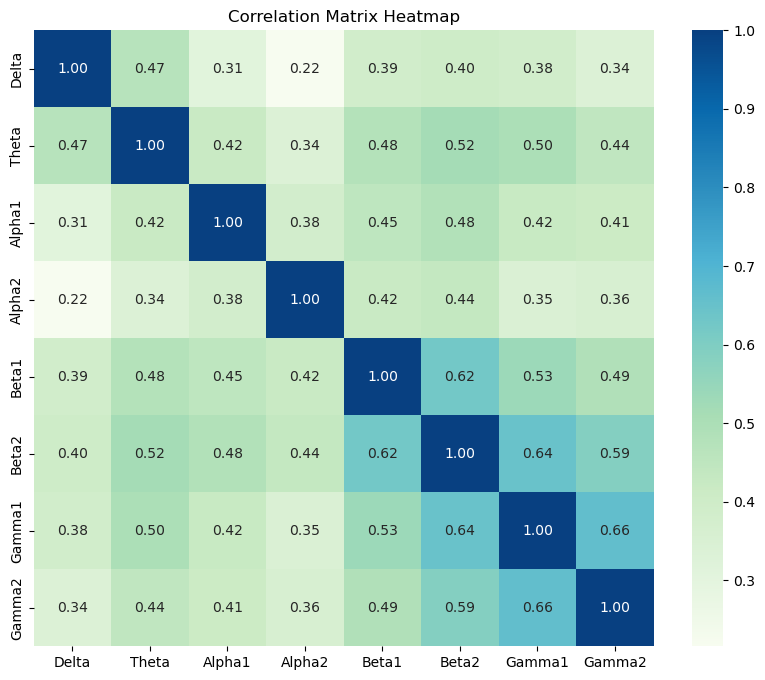

In [9]:
# 加载所有文件夹的数据
folder_paths = ['./脑电波数据/A1.csv','./脑电波数据/A2.csv','./脑电波数据/A3.csv','./脑电波数据/A4.csv',
                './脑电波数据/A5.csv','./脑电波数据/A6.csv','./脑电波数据/A7.csv','./脑电波数据/A8.csv',
                './脑电波数据/A9.csv','./脑电波数据/A10.csv','./脑电波数据/A11.csv','./脑电波数据/A12.csv',
                './脑电波数据/A13.csv','./脑电波数据/A14.csv','./脑电波数据/A15.csv','./脑电波数据/A16.csv',
                './脑电波数据/A17.csv','./脑电波数据/A18.csv','./脑电波数据/A19.csv','./脑电波数据/A20.csv',
                './脑电波数据/A21.csv','./脑电波数据/A22.csv','./脑电波数据/A23.csv','./脑电波数据/A24.csv',
                './脑电波数据/A25.csv',]  # 25个文件夹的路径列表
correlation_matrices = []

for folder_path in folder_paths:
    data = load_time_series_data(folder_path)
    corr_matrix = calculate_correlation_matrix(data)
    correlation_matrices.append(corr_matrix)


# 这里你可以对每个文件夹的相关性矩阵进行进一步分析
# 例如，你可以计算所有文件夹相关性矩阵的平均值
average_corr_matrix = np.mean(correlation_matrices, axis=0)
average_corr_matrix_df = pd.DataFrame(average_corr_matrix,
                                      index=["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"],
                                      columns=["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"])
# average_corr_matrix_df.index_labels = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]  # 假设有这些标签
# average_corr_matrix_df.column_labels = average_corr_matrix_df.index_labels[:]  # 通常列标签和索引标签相同
print(average_corr_matrix_df)
# print(average_corr_matrix)
# 可视化平均相关性矩阵
# import seaborn as sns
# sns.heatmap(average_corr_matrix, annot=True)

plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(average_corr_matrix_df, annot=True, fmt=".2f", cmap='GnBu', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()
